# INTRODUCTION

The bike-sharing provider, BoomBikes, has experienced a decline in revenue due to the ongoing Corona pandemic. In order to understand the demand for shared bikes after the quarantine situation ends, the company has engaged a consulting firm to analyze the factors that influence the demand for shared bikes in the American market. A large dataset containing daily bike rental information, including various meteorological surveys and user behavior, has been collected for analysis. The objective of this project is to build a multiple linear regression model to predict the demand for shared bikes based on environmental and seasonal settings.

# BUSINESS UNDERSTANDING

The primary objective of this analysis is to gain insights into the factors that significantly impact the demand for shared bikes in the American market. By understanding these factors, BoomBikes can adjust their business strategy to meet demand levels and customer expectations effectively. The analysis aims to answer questions such as:

1.How do environmental variables such as temperature, humidity, and wind speed affect bike demand?
2.What is the impact of seasonal variations on bike rentals?
3.Does weather condition, categorized into different weathersit levels, influence the bike demand?
4.Are there any other factors, such as holidays or working days, that affect bike rentals?

# BUSINESS OBJECTIVE

The primary business objective of this project is to develop a reliable multiple linear regression model that accurately predicts the demand for shared bikes. By achieving this objective, BoomBikes aims to:

1.Understand the significant variables that drive bike demand and their respective impact.
2.Gain insights into the seasonal patterns of bike rentals and adjust inventory and marketing strategies accordingly.
3.Provide data-driven recommendations for pricing, promotions, and operational planning to maximize revenue and customer satisfaction.
4.Enable effective resource allocation and capacity planning based on anticipated demand levels.

# GETTING JUPITER READY

# Import Python Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

# Set the style using seaborn
sns.set_theme(style='darkgrid')

# Set the style to a seaborn style others are 'seaborn-whitegrid', or 'seaborn-ticks'
sns.set_style('darkgrid')

# Supress Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Adjust Jupiter Views

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# READING AND UNDERSTANDING THE DATA

# Importing the input files

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Inspect data frames

In [5]:
data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
434,435,11-03-2019,1,1,3,0,0,0,1,14.831299,17.983500,47.6957,14.913329,1658,3253,4911
504,505,20-05-2019,2,1,5,0,0,0,1,25.454153,29.198350,53.0417,17.042589,2704,4425,7129
386,387,22-01-2019,1,1,1,0,0,0,2,6.662500,8.112500,79.6250,13.375746,196,1781,1977
22,23,23-01-2018,1,0,1,0,0,0,1,3.957390,4.941955,43.6522,16.522200,150,836,986
627,628,20-09-2019,3,1,9,0,4,1,1,22.413347,26.609600,61.8333,7.917189,939,6781,7720


In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
# Checking the numeric variables of the dataframes
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# Database dimension
print("Database dimension     :",data.shape)
#Database size
print("Database size -         :",data.size)

Database dimension     : (730, 16)
Database size -         : 11680


# DATA PREPARATION

# Null value calculation

In [11]:
# % null value in each column
round(data.isnull().sum() / data.shape[0] * 100.00,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Insight:
Based on the above Matrix, it is evidednt that the dataset has no missing values.

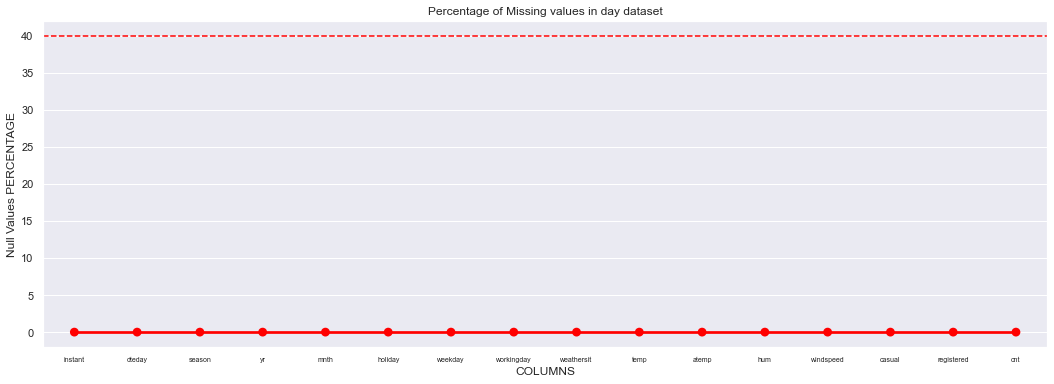

In [12]:
null_data = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
null_data.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_data,color='red')
plt.xticks(rotation =0,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in day dataset")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

Insight:
From the plot we can see there are no columns in which percentage of null values more than 40% are marked above the red line and all the columns which have less than 40 % null values below the red line.

# Analyze & Delete Unnecessary Columns in applicationDF 

In [13]:
data.drop(['instant'],axis=1,inplace=True)

Insight:
we can see that instant is an index column so we droped it

In [14]:
data.drop(['dteday'],axis=1,inplace=True)

Insight:
we can see the column yr and month contains the data of dteday so to avoid confusion droped the dteday column

In [15]:
data.drop(['casual','registered'],axis=1,inplace=True)

Insight:
Since the total count of rentals (`cnt`) is the sum of casual and registered users, we will exclude the variables "casual" and "registered" from our analysis as they are components of the target variable.

# Standardized values

Convert 'season', 'weathersit', and 'weekday' into categorical variables

In [16]:
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'})
data['weekday']=data['weekday'].map(({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}))

# Data type conversion

changing the datatypes of 'temp','atemp','hum','windspeed','cnt' columns to appropriate types

In [17]:
columns_to_convert = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric)

# Null value Data imputation

Since there are no null values in any of the columns, further imputation is not required.

# Identifying the outliers

Finding outlier information in day data

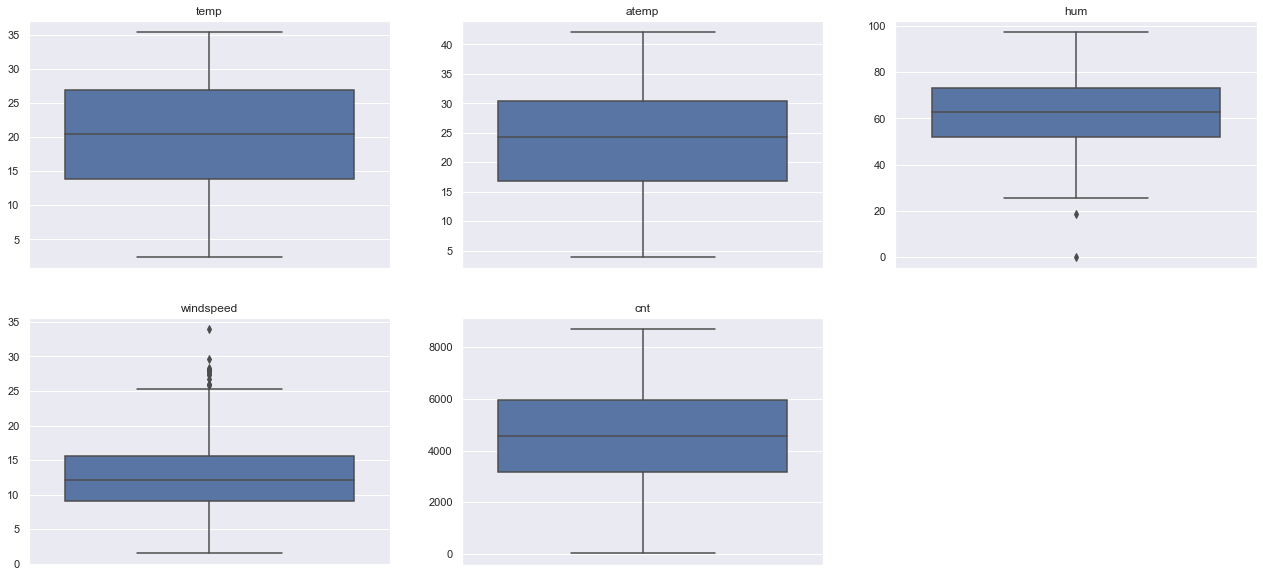

In [18]:
plt.figure(figsize=(22,10))

data_outlier_col = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for i in enumerate(data_outlier_col):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(y=data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [19]:
# Select the columns with numerical data
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Calculate the IQR for each column
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Identify outliers for each column
outliers = ((data[numeric_columns] < (Q1 - threshold * IQR)) | (data[numeric_columns] > (Q3 + threshold * IQR))).any()

# Print the columns with outliers
outlier_columns = outliers[outliers].index.tolist()
print("Columns with potential outliers:", outlier_columns)


Columns with potential outliers: ['hum', 'windspeed']


Insight:
For the 'hum' column, high outliers could indicate instances of exceptionally high humidity levels. These instances might be attributed to specific weather conditions or measurement errors. Similarly, for the 'windspeed' column, outliers could represent instances of unusually strong wind speeds, which could be due to specific weather patterns or measurement anomalies.

# DATA ANALYSIS

# Univariate Analysis

# Univariate Analysis on Numerical Columns 

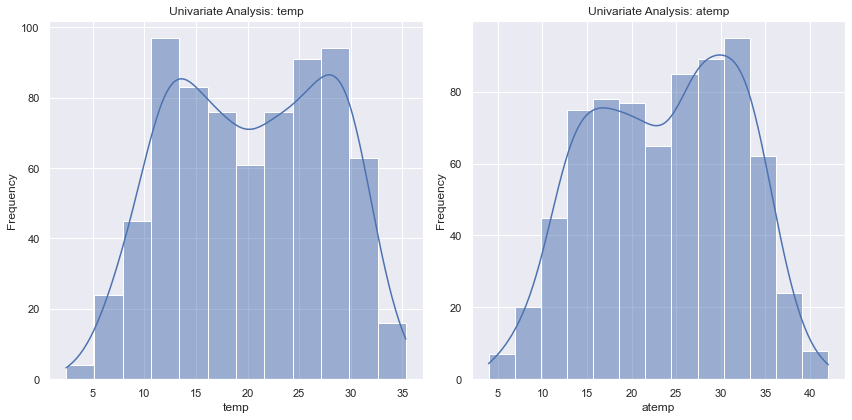

In [20]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Univariate analysis for 'temp'
sns.histplot(data=data, x='temp', kde=True, ax=axes[0])
axes[0].set_xlabel('temp')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Univariate Analysis: temp')

# Univariate analysis for 'atemp'
sns.histplot(data=data, x='atemp', kde=True, ax=axes[1])
axes[1].set_xlabel('atemp')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Univariate Analysis: atemp')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

Insight:
From above graphs we can say that temp and atemp have a almost same distribution

# Univariate Analysis on Categorical Columns 

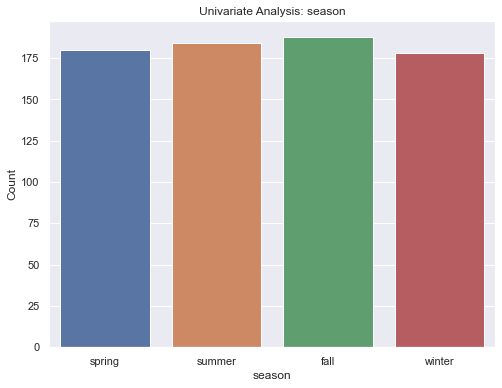

In [21]:
# Select the categorical column for univariate analysis
categorical_column = 'season'

# Calculate the value counts of the categorical column
value_counts = data[categorical_column].value_counts()

# Plot the value counts as a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title('Univariate Analysis: ' + categorical_column)
plt.show()

Insight:
The bar plot shows that each season occurs with similar frequencies, indicating that the dataset contains a roughly equal representation of bike rental data across different seasons.

# BIVARIATE ANALYSIS

# Bivariate Analysis on Numerical Columns 

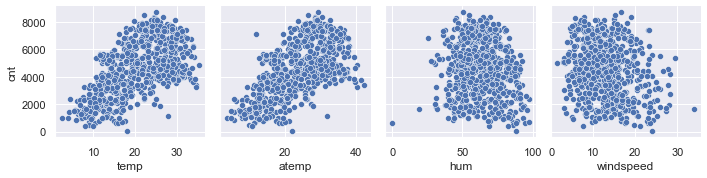

In [22]:
# Plot scatter plots to visualize the relationships
sns.pairplot(data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', kind='scatter')
plt.show()

Insight:
from above graphs we can say that temp and atemp have a showing almost similar distribution with respect to cnt column

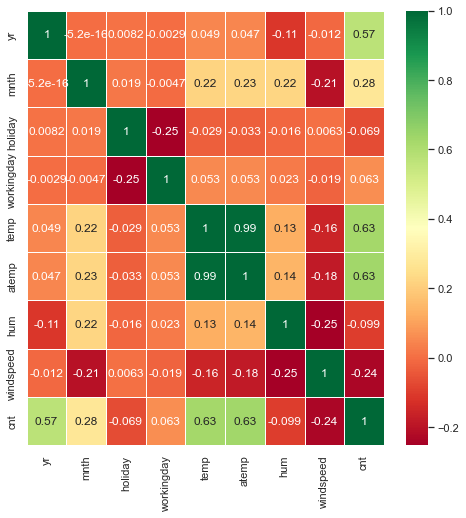

In [23]:
Contact_corr = data.corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

Insight:
correlation between temp and atemp is 0.99 which is almost 1. Based on this high correlation, we can conclude that there is a strong linear relationship between the actual temperature and the perceived temperature. It suggests that when the actual temperature increases or decreases, the perceived temperature follows a very similar pattern.

In [24]:
data.drop(['temp'],axis=1,inplace=True)

Since the 'temp' and 'atemp' columns have a high correlation of 0.99, indicating a strong linear relationship and redundancy between the variables, it is generally reasonable to drop one of them to avoid multicollinearity in the dataset.
In this case, you can consider dropping the 'temp' column, as 'atemp' provides similar information but represents the perceived temperature. By dropping the 'temp' column, you can simplify the dataset and reduce redundancy without losing significant information.

# Bivariate Analysis on Categorical Columns 

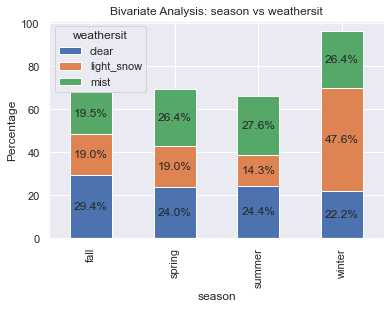

In [25]:
# Select the categorical columns for bivariate analysis
categorical_column_1 = 'season'
categorical_column_2 = 'weathersit'

# Create a cross-tabulation (contingency table)
cross_tab = pd.crosstab(data[categorical_column_1], data[categorical_column_2])

# Calculate column-wise percentages
column_totals = cross_tab.sum(axis=0)
cross_tab_percentages = cross_tab.div(column_totals, axis=1) * 100

# Plot a stacked bar plot with percentages

ax = cross_tab_percentages.plot(kind='bar', stacked=True)

# Add percentages inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel(categorical_column_1)
plt.ylabel('Percentage')
plt.title('Bivariate Analysis: ' + categorical_column_1 + ' vs ' + categorical_column_2)
plt.legend(title=categorical_column_2)
plt.show()

Fall: Among the different weather situations, 'clear' represents the highest percentage (29.4%) in the fall season, followed by 'mist' (19.5%) and 'light_snow' (19.0%). This indicates that clear weather conditions are relatively more common during the fall season.
Spring: In the spring season, 'clear' weather still has the highest percentage (24.0%), followed by 'mist' (26.4%) and 'light_snow' (19.0%). This suggests that clear weather conditions are prevalent during the spring season as well.
Summer: Similar to fall and spring, 'clear' weather is the most frequent situation during the summer season, with a percentage of 24.4%. 'Mist' follows closely at 27.6%, while 'light_snow' has the lowest percentage (14.3%) during the summer. This indicates a higher likelihood of clear weather during the summer months.
Winter: Interestingly, the winter season exhibits a different distribution of weather situations compared to the other seasons. 'Light_snow' has the highest percentage (47.6%) in winter, followed by 'mist' (26.4%) and 'clear' (22.2%). This suggests that snowfall is more common during the winter season, which aligns with the typical weather patterns in colder regions.

# Creating dummy variables

By creating dummy variables, we convert categorical variables into a binary numerical representation. Each category of the variable is transformed into a separate binary variable (0 or 1), making it easier for algorithms to process and interpret the data.

In [26]:
data['mnth']=data['mnth'].astype(object)
data['season']=data['season'].astype(object)
data['weathersit']=data['weathersit'].astype(object)
data['weekday']=data['weekday'].astype(object)

Convert the variables to an object type to facilitate the creation of dummy variables.

In [27]:
season_dummies = pd.get_dummies(data['season'], prefix='season', drop_first=True)
weathersit_dummies = pd.get_dummies(data['weathersit'], prefix='weathersit', drop_first=True)
weekday_dummies=pd.get_dummies(data['weekday'],drop_first=True)
Month_dummies=pd.get_dummies(data['mnth'],drop_first=True)

Convert categorical variables to dummy variables

In [28]:
data = pd.concat([data, season_dummies, weathersit_dummies,weekday_dummies,Month_dummies], axis=1)

Concatenate the dummy variables with the original dataset

In [29]:
data.drop(['season', 'weathersit','weekday','mnth'], axis=1, inplace=True)

Drop the original categorical variables

# MODEL BUILDING

In [30]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)
# Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Create X_train and y_train
y_train = df_train['cnt']
X_train = df_train.drop('cnt', axis=1)

X_train_str = X_train.copy()
X_train_str.columns = [str(col) for col in X_train.columns]

# FEATURE SELECTION

Using the Recursive Feature Elimination (RFE) approach for feature selection, we begin with 15 variables and employ a combination of methods to build a model.

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create the estimator (in this case, a LinearRegression model)
lm = LinearRegression()

# Create the RFE object
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE object to the training data
rfe.fit(X_train_str, y_train)

# Get the selected feature indices
feature_mask = rfe.support_

# Get the selected feature names
selected_features = X_train_str.columns[feature_mask]

In [32]:
list(zip(X_train_str.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('2', False, 5),
 ('3', True, 1),
 ('4', True, 1),
 ('5', True, 1),
 ('6', True, 1),
 ('7', False, 6),
 ('8', True, 1),
 ('9', True, 1),
 ('10', False, 2),
 ('11', False, 8),
 ('12', False, 9)]

In [33]:
print(selected_features)

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'weathersit_light_snow', 'weathersit_mist', '3', '4', '5', '6', '8', '9'], dtype='object')


In [34]:
X_train_rfe = X_train_str[selected_features]

In [35]:
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,4,5,6,8,9
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


# FEATURE SELECTION USING VIF AND p-values

BUILDING MODEL USING STATSMODEL:

In [36]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe1).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          8.06e-186
Time:                        22:15:36   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,season_spring,3.52
6,season_winter,3.21
8,weathersit_mist,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


Insight:
workingday: It has a very high VIF of 40.72, indicating strong multicollinearity with other variables. High multicollinearity can affect the model's stability and interpretability.

In [39]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe1).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          8.06e-186
Time:                        22:17:27   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,season_spring,3.52
6,season_winter,3.21
8,weathersit_mist,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


Insight:
Based on the updated VIF values, the 'hum' column has a VIF of 23.78, which indicates high multicollinearity.

In [41]:
# DROP THE HUM COLUMN
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [42]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          2.75e-183
Time:                        22:18:37   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,season_spring,2.10
0,yr,2.08
5,season_winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,weathersit_mist,1.55
9,4,1.54


Insight:
The coefficient for 'Saturday' is close to zero (0.0114), indicating that it has a minimal impact on the target variable.
The p-value for 'Saturday' is 0.326, which is greater than the significance level of 0.05. This suggests that 'Saturday' may not be statistically significant in predicting the target variable.

In [45]:
X_train_rfe3 = sm.add_constant(X_train_rfe)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          2.75e-183
Time:                        22:19:48   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,season_spring,2.10
0,yr,2.08
5,season_winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,weathersit_mist,1.55
9,4,1.54


Insight:
'atemp', indicating the presence of multicollinearity

In [47]:
# drop atemp column
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [48]:
X_train_rfe4 = sm.add_constant(X_train_rfe)

lm4 = sm.OLS(y_train,X_train_rfe4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.90e-153
Time:                        22:22:32   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,season_spring,2.10
0,yr,1.90
4,season_winter,1.80
6,weathersit_mist,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


Insight:
'windspeed', indicating the presence of multicollinearity

In [50]:
# Drop the Windspeed column
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [51]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          9.96e-148
Time:                        22:23:35   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.46

In [52]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
5,weathersit_mist,1.53
2,season_spring,1.48
3,season_winter,1.39
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.12
9,6,1.08


In [53]:
# Including season_summer as a variable and evaluating if it enhances the model's performance.

X_train_rfe['season_summer']=X_train_str['season_summer']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,4,5,6,8,9,season_summer
653,1,0,0,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,1,0,0,0,0,1


In [54]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     130.2
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          1.70e-150
Time:                        22:25:13   Log-Likelihood:                 417.09
No. Observations:                 510   AIC:                            -806.2
Df Residuals:                     496   BIC:                            -746.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.48

In [55]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,season_summer,6.77
8,5,3.28
7,4,3.14
0,yr,1.86
9,6,1.84
6,3,1.70
2,season_spring,1.62
5,weathersit_mist,1.57
3,season_winter,1.40
10,8,1.18


Insight:
The column with index 8 has a relatively high p-value of 0.061, indicating that it is not statistically significant. Therefore, we will remove it from the model.

In [56]:
# Drop the column 8
X_train_rfe=X_train_rfe.drop(['8'],axis=1)

In [57]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     137.1
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          4.80e-149
Time:                        22:26:33   Log-Likelihood:                 411.06
No. Observations:                 510   AIC:                            -796.1
Df Residuals:                     497   BIC:                            -741.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [58]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,season_summer,6.74
8,5,3.28
7,4,3.14
9,6,1.84
6,3,1.70
0,yr,1.67
2,season_spring,1.58
5,weathersit_mist,1.50
3,season_winter,1.35
10,9,1.11


In [60]:
# Including Monday as a variable and evaluating if it enhances the model's performance.

X_train_rfe['Monday']=X_train_str['Monday']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,4,5,6,9,season_summer,Monday
653,1,0,0,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,1,0,0,0,1,0


In [61]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     126.6
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.92e-148
Time:                        22:29:06   Log-Likelihood:                 411.45
No. Observations:                 510   AIC:                            -794.9
Df Residuals:                     496   BIC:                            -735.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [62]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,season_summer,6.75
8,5,3.28
7,4,3.14
9,6,1.84
0,yr,1.70
6,3,1.70
2,season_spring,1.59
5,weathersit_mist,1.50
3,season_winter,1.37
12,Monday,1.27


In [63]:
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

Insight:
Droped the column Monday beacuse the p value of Monday is 0.167

In [64]:
# Including Thursday as a variable and evaluating if it enhances the model's performance.

X_train_rfe['Thursday']=X_train_str['Thursday']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,4,5,6,9,season_summer,Thursday
653,1,0,0,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,1,0,0,0,1,0


In [65]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     126.3
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          5.60e-148
Time:                        22:30:23   Log-Likelihood:                 411.08
No. Observations:                 510   AIC:                            -794.2
Df Residuals:                     496   BIC:                            -734.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [66]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,season_summer,6.75
8,5,3.28
7,4,3.14
9,6,1.84
6,3,1.71
0,yr,1.68
2,season_spring,1.59
5,weathersit_mist,1.50
3,season_winter,1.37
12,Thursday,1.13


In [67]:
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

Insight:
The column "Thursday" has been dropped from the model because its p-value is 0.854, indicating that it is not statistically significant.

In [68]:
# Including Tuesday as a variable and evaluating if it enhances the model's performance.

X_train_rfe['Tuesday']=X_train_str['Tuesday']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,4,5,6,9,season_summer,Tuesday
653,1,0,0,1,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,1,0,0,0,1,0


In [69]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     126.3
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          5.61e-148
Time:                        22:32:57   Log-Likelihood:                 411.08
No. Observations:                 510   AIC:                            -794.2
Df Residuals:                     496   BIC:                            -734.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [70]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,season_summer,6.75
8,5,3.28
7,4,3.14
9,6,1.84
6,3,1.70
0,yr,1.69
2,season_spring,1.59
5,weathersit_mist,1.50
3,season_winter,1.37
12,Tuesday,1.13


In [71]:
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [72]:
# Including Wednesday as a variable and evaluating if it enhances the model's performance.

X_train_rfe['Wednesday']=X_train_str['Wednesday']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,4,5,6,9,season_summer,Wednesday
653,1,0,0,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,1,0,0,0,1,0


In [73]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     126.8
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          2.60e-148
Time:                        22:33:59   Log-Likelihood:                 411.88
No. Observations:                 510   AIC:                            -795.8
Df Residuals:                     496   BIC:                            -736.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [74]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,season_summer,6.75
8,5,3.28
7,4,3.14
9,6,1.85
6,3,1.70
0,yr,1.68
2,season_spring,1.60
5,weathersit_mist,1.50
3,season_winter,1.37
12,Wednesday,1.19


In [75]:
X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [76]:
# Including month 2 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['2']=X_train_str['2']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,4,5,6,9,season_summer,2
653,1,0,0,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,1,0,0,0,1,0


In [77]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     126.6
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.92e-148
Time:                        22:34:54   Log-Likelihood:                 411.45
No. Observations:                 510   AIC:                            -794.9
Df Residuals:                     496   BIC:                            -735.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [78]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,season_summer,6.97
8,5,3.35
7,4,3.21
2,season_spring,2.26
6,3,1.90
9,6,1.86
0,yr,1.68
12,2,1.54
5,weathersit_mist,1.50
3,season_winter,1.35


In [79]:
X_train_rfe=X_train_rfe.drop(['2'],axis=1)

In [80]:
# Including month 3 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['3']=X_train_str['3']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,4,5,6,9,season_summer
653,1,0,0,1,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,1,0,0,0,1


In [81]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     137.1
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          4.80e-149
Time:                        22:39:17   Log-Likelihood:                 411.06
No. Observations:                 510   AIC:                            -796.1
Df Residuals:                     497   BIC:                            -741.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [82]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,season_summer,6.74
8,5,3.28
7,4,3.14
9,6,1.84
6,3,1.70
0,yr,1.67
2,season_spring,1.58
5,weathersit_mist,1.50
3,season_winter,1.35
10,9,1.11


In [83]:
# Including month 4 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['4']=X_train_str['4']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,4,5,6,9,season_summer
653,1,0,0,1,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,1,0,0,0,1


In [84]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     137.1
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          4.80e-149
Time:                        22:40:19   Log-Likelihood:                 411.06
No. Observations:                 510   AIC:                            -796.1
Df Residuals:                     497   BIC:                            -741.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [85]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,season_summer,6.74
8,5,3.28
7,4,3.14
9,6,1.84
6,3,1.70
0,yr,1.67
2,season_spring,1.58
5,weathersit_mist,1.50
3,season_winter,1.35
10,9,1.11


In [86]:
X_train_rfe=X_train_rfe.drop(['4'],axis=1)

In [87]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     149.3
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          7.37e-150
Time:                        22:40:59   Log-Likelihood:                 410.38
No. Observations:                 510   AIC:                            -796.8
Df Residuals:                     498   BIC:                            -746.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [88]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,season_summer,2.41
7,5,1.74
0,yr,1.65
2,season_spring,1.54
5,weathersit_mist,1.50
6,3,1.36
3,season_winter,1.35
8,6,1.27
9,9,1.11
4,weathersit_light_snow,1.06


In [89]:
# Including month 6 as a variable and evaluating if it enhances the model's performance.
X_train_rfe['6']=X_train_str['6']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,5,6,9,season_summer
653,1,0,0,1,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,1


In [90]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     149.3
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          7.37e-150
Time:                        22:41:37   Log-Likelihood:                 410.38
No. Observations:                 510   AIC:                            -796.8
Df Residuals:                     498   BIC:                            -746.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [91]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,season_summer,2.41
7,5,1.74
0,yr,1.65
2,season_spring,1.54
5,weathersit_mist,1.50
6,3,1.36
3,season_winter,1.35
8,6,1.27
9,9,1.11
4,weathersit_light_snow,1.06


In [92]:
# Including month 7 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['7']=X_train_str['7']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,5,6,9,season_summer,7
653,1,0,0,1,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,1,0


In [93]:
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     136.7
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          8.63e-149
Time:                        22:42:21   Log-Likelihood:                 410.45
No. Observations:                 510   AIC:                            -794.9
Df Residuals:                     497   BIC:                            -739.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [94]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,season_summer,2.43
0,yr,1.78
7,5,1.74
2,season_spring,1.56
5,weathersit_mist,1.50
3,season_winter,1.37
6,3,1.36
8,6,1.27
9,9,1.11
11,7,1.09


In [95]:
X_train_rfe=X_train_rfe.drop(['7'],axis=1)

In [96]:
# Including month 10 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['10']=X_train_str['10']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,5,6,9,season_summer,10
653,1,0,0,1,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,1,0


In [97]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     144.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          4.23e-153
Time:                        22:43:13   Log-Likelihood:                 420.70
No. Observations:                 510   AIC:                            -815.4
Df Residuals:                     497   BIC:                            -760.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [98]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,season_summer,2.41
3,season_winter,1.86
7,5,1.74
0,yr,1.65
11,10,1.57
2,season_spring,1.54
5,weathersit_mist,1.50
6,3,1.36
8,6,1.27
9,9,1.12


In [99]:
# Including month 11 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['11']=X_train_str['11']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,5,6,9,season_summer,10,11
653,1,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,1,0,0,0,0,1,0,0


In [100]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     133.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.01e-152
Time:                        22:43:53   Log-Likelihood:                 421.26
No. Observations:                 510   AIC:                            -814.5
Df Residuals:                     496   BIC:                            -755.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [101]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_winter,3.67
10,season_summer,2.41
11,10,2.23
12,11,2.23
7,5,1.74
0,yr,1.66
2,season_spring,1.54
5,weathersit_mist,1.50
6,3,1.36
8,6,1.27


In [103]:
# Including month 12 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['12']=X_train_str['12']
X_train_rfe.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,5,6,9,season_summer,10,11,12
653,1,0,0,1,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [104]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     125.2
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          1.71e-152
Time:                        22:44:49   Log-Likelihood:                 424.41
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     495   BIC:                            -755.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.52

In [105]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_winter,8.53
12,11,3.97
11,10,3.96
13,12,2.54
10,season_summer,2.42
7,5,1.74
0,yr,1.66
2,season_spring,1.64
5,weathersit_mist,1.50
6,3,1.39


# BUILDING THE FINAL MODEL

In [106]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     125.2
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          1.71e-152
Time:                        22:48:42   Log-Likelihood:                 424.41
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     495   BIC:                            -755.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.52

In [107]:
X_train_rfe17.shape

(510, 15)

In [108]:
# all
print(X_train_rfe17.columns.to_list())

['const', 'yr', 'holiday', 'season_spring', 'season_winter', 'weathersit_light_snow', 'weathersit_mist', '3', '5', '6', '9', 'season_summer', '10', '11', '12']


In [109]:
#Predict values
y_train_cnt = lm17.predict(X_train_rfe17[:])

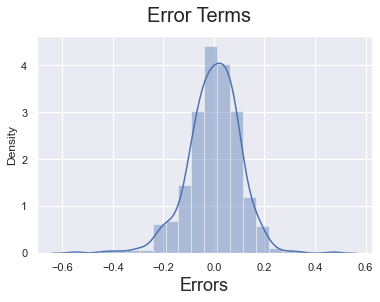

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

#CALCULATING RESIDUALS
res=y_train - y_train_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                       
plt.show()

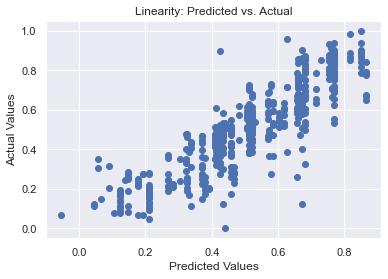

In [111]:
# Plotting predicted values vs. actual values
plt.scatter(y_train_cnt, y_train)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity: Predicted vs. Actual')
plt.show()

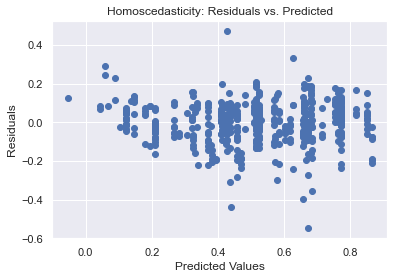

In [112]:
# Plotting residuals vs. predicted values
plt.scatter(y_train_cnt, res)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Residuals vs. Predicted')
plt.show()

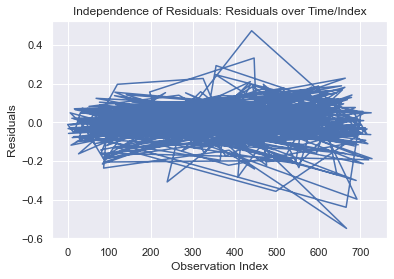

In [113]:
# Plotting residuals over time or index
plt.plot(res)
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Independence of Residuals: Residuals over Time/Index')
plt.show()

In [114]:
print(X_train_rfe17.shape)
print(res.shape)

(510, 15)
(510,)


In [115]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [116]:
# #Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [117]:
# # CREATING X AND Y
y_test = df_test['cnt']
X_test = df_test.drop('cnt', axis=1)

X_train_new=X_train_rfe17.drop(['const'], axis=1)

In [118]:
X_train_new.head()

,yr,holiday,season_spring,season_winter,weathersit_light_snow,weathersit_mist,3,5,6,9,season_summer,10,11,12
653,1,0,0,1,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [119]:
X_train_new.columns = X_train_new.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

X_test_new = X_test[X_train_new.columns]

In [120]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [121]:
#Making predictions on the chosen model

y_pred = lm17.predict(X_test_new)

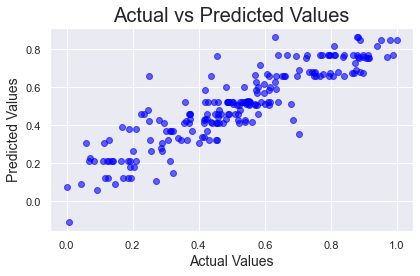

In [122]:
# Create a scatter plot of y_test vs y_pred
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Set plot title and labels
plt.title("Actual vs Predicted Values", fontsize=20)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)

# Customize plot aesthetics
plt.grid(True)
plt.tight_layout()
plt.show()

# MODEL EVALUTION

In [123]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [124]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 0.08067171503891539
MSE 0.0114503642308419
R2 score 0.7981188556072265


# ADDITIONAL ANALYSIS AND CONCLUSION

In [125]:
# Baseline model: Predict the mean value of the target variable for all instances
y_baseline = np.full_like(y_test, np.mean(y_train))

# Calculate evaluation metrics for the baseline model
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))
baseline_r2 = r2_score(y_test, y_baseline)

# Calculate evaluation metrics for your trained model
model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
model_r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics for comparison
print("Baseline RMSE:", baseline_rmse)
print("Baseline R-squared:", baseline_r2)
print("Model RMSE:", model_rmse)
print("Model R-squared:", model_r2)

Baseline RMSE: 0.23817028526896025
Baseline R-squared: -0.00011884349906554625
Model RMSE: 0.10700637472058336
Model R-squared: 0.7981188556072265


In [126]:
# Get the coefficients and intercept
coefficients = lm17.params[1:]  # Exclude the intercept
intercept = lm17.params[0]  # Intercept term

# Create a list of feature names
feature_names = X_train_new.columns.tolist()

# Create the equation string
equation = f"cnt = {intercept:.4f}"
for feature, coefficient in zip(feature_names, coefficients):
    equation += f" + ({coefficient:.4f} * {feature})"
    
print("Equation for the best-fitted line:")
print(equation)

Equation for the best-fitted line:
cnt = 0.5228 + (0.2473 * yr) + (-0.0796 * holiday) + (-0.3121 * season_spring) + (-0.0332 * season_winter) + (-0.3210 * weathersit_light_snow) + (-0.0880 * weathersit_mist) + (0.0558 * 3) + (0.1107 * 5) + (0.0951 * 6) + (0.0803 * 9) + (-0.1104 * season_summer) + (0.0242 * 10) + (-0.0793 * 11) + (-0.0651 * 12)


Overall, the conclusions derived from the regression analysis provide insights into the factors that impact bike demand, addressing the business objectives to understand the factors affecting bike rentals in the American market.